In [3]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Read data set

path='/content/drive/MyDrive/Data sets/crop_recommendation/crop_recommendation.csv'

df=pd.read_csv(path)

In [10]:
# Data processing

df.head()

,N,P,K,temperature,humidity,ph,rainfall,Soil_Type,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,clay loam soil,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,clay loam soil,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,clay loam soil,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,clay loam soil,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,clay loam soil,rice


In [11]:
df.shape

(2200, 9)

In [12]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Soil_Type',
       'label'],
      dtype='object')

In [13]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [14]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
Soil_Type       object
label           object
dtype: object

In [15]:
df['label'].value_counts()

kidneybeans    100
jute           100
maize          100
watermelon     100
grapes         100
mango          100
rice           100
pigeonpeas     100
papaya         100
coconut        100
chickpea       100
lentil         100
blackgram      100
mothbeans      100
muskmelon      100
apple          100
cotton         100
pomegranate    100
coffee         100
banana         100
mungbean       100
orange         100
Name: label, dtype: int64

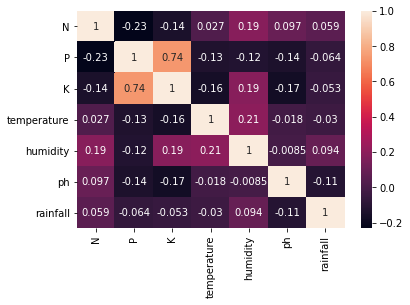

In [16]:
# Correlation between independent variables

sns.heatmap(df.corr(),annot=True)

In [17]:
## Separating features and target label
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']

In [20]:
# Initialzing empty lists to append all model's name and corresponding name
accuracy = []
models = []

In [19]:
# Splitting dataset into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

**Decission Tree** 

In [44]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(Xtrain,Ytrain)
predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
models.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [22]:
# Cross validation score (Decision Tree)
from sklearn.model_selection import cross_val_score
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [28]:
## Saving trained decission tree model
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = '/content/drive/MyDrive/Data sets/crop_recommendation/models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

**Random Forest**

In [45]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
models.append('RF')
print("RF's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  99.0909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00  

In [30]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

In [31]:
## Saving trained random forest model

import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = '/content/drive/MyDrive/Data sets/crop_recommendation/models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

**Logistic Regression**

In [46]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
models.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  95.22727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00    

In [33]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

In [35]:
## Save trained logistic model
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = '/content/drive/MyDrive/Data sets/crop_recommendation/models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

**Gaussian Naive Bayes**

In [47]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
models.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  99.0909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00   

In [37]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [38]:
## Saving trained Gaussian Naive Bayes model

import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '/content/drive/MyDrive/Data sets/crop_recommendation/models/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

**Support Vector Machine**

In [48]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
models.append('SVM')
print("SVM's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  10.681818181818182
              precision    recall  f1-score   support

       apple       1.00      0.23      0.38        13
      banana       1.00      0.24      0.38        17
   blackgram       1.00      0.19      0.32        16
    chickpea       1.00      0.05      0.09        21
     coconut       1.00      0.05      0.09        21
      coffee       0.00      0.00      0.00        22
      cotton       1.00      0.05      0.10        20
      grapes       1.00      0.06      0.11        18
        jute       1.00      0.07      0.13        28
 kidneybeans       0.03      1.00      0.07        14
      lentil       0.00      0.00      0.00        23
       maize       0.00      0.00      0.00        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      0.12      0.22        24
   muskmelon       1.00      0.30      0.47        23
      orange       1.00      0.03      0.0

In [40]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.27727273, 0.28863636, 0.29090909, 0.275     , 0.26818182])

**XGBoost**

In [49]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
models.append('XGBoost')
print("XGBoost's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  99.31818181818181
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.96      0.93      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      

In [42]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

array([0.98636364, 0.99318182, 0.99545455, 0.99090909, 0.98409091])

In [43]:
## Saving Trained XGBoost model
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = '/content/drive/MyDrive/Data sets/crop_recommendation/models/XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()


**Accuracy Comparision**

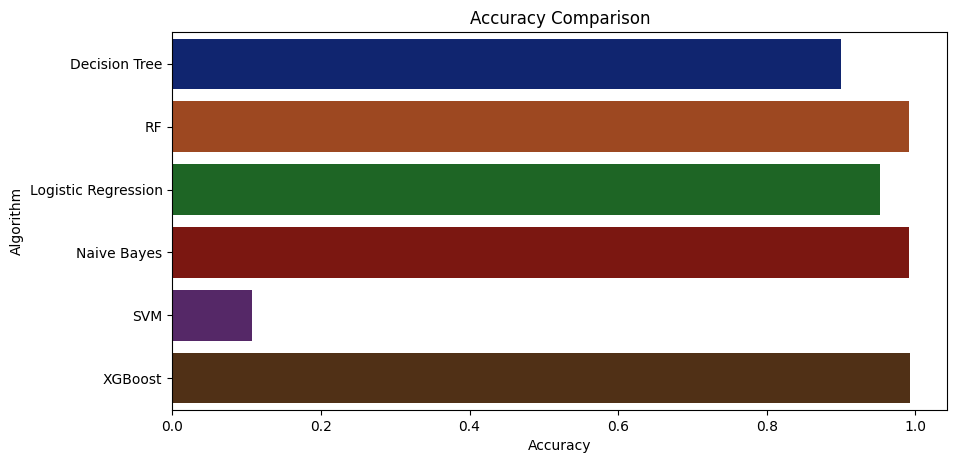

In [51]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = accuracy,y = models,palette='dark')

In [52]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
RF --> 0.990909090909091
Logistic Regression --> 0.9522727272727273
Naive Bayes --> 0.990909090909091
SVM --> 0.10681818181818181
XGBoost --> 0.9931818181818182


**Making Prediction**

In [53]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [54]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']
